In [1]:
# Импорт цен акций за указанный период
import urllib.request
import datetime
import time
import math
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sps
from sklearn import model_selection, datasets, linear_model, metrics, preprocessing
from sklearn.model_selection import TimeSeriesSplit
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')
# Тикеры акций и их id в системе Finam
tickers={'DJ.W1IDU':20447,'DJ.W1FIN':20459,'NASDAQCOMP':82075,'EURUSD':83,'USDCNY':83225,'INDUSDX':438796,'NYMEX.NG':18949,'ICE.BRN':19473,'GDAX.BCH-USD':491809,'comex.SI':18952, 'comex.GC':18953, 'USDCB':82485, 'D&J-IND':91, 'LME.Nickel':18932,'LME.Alum':18930, 'RTSI':95,'ABRD':82460,'AESL':181867,'AFKS':19715,'AFLT':29,'AGRO':399716,'AKRN':17564,'ALBK':82616,'ALNU':81882,'ALRS':81820,'AMEZ':20702,'APTK':13855,'AQUA':35238,'ARMD':19676,'ARSA':19915,'ASSB':16452,'AVAN':82843,'AVAZ':39,'AVAZP':40,'BANE':81757,'BANEP':81758,'BGDE':175840,'BISV':35242,'BISVP':35243,'BLNG':21078,'BRZL':81901,'BSPB':20066,'CBOM':420694,'CHEP':20999,'CHGZ':81933,'CHKZ':21000,'CHMF':16136,'CHMK':21001,'CHZN':19960,'CLSB':16712,'CLSBP':16713,'CNTL':21002,'CNTLP':81575,'DASB':16825,'DGBZ':17919,'DIOD':35363,'DIXY':18564,'DVEC':19724,'DZRD':74744,'DZRDP':74745,'ELTZ':81934,'ENRU':16440,'EPLN':451471,'ERCO':81935,'FEES':20509,'FESH':20708,'FORTP':82164,'GAZA':81997,'GAZAP':81998,'GAZC':81398,'GAZP':16842,'GAZS':81399,'GAZT':82115,'GCHE':20125,'GMKN':795,'GRAZ':16610,'GRNT':449114,'GTLC':152876,'GTPR':175842,'GTSS':436120,'HALS':17698,'HIMC':81939,'HIMCP':81940,'HYDR':20266,'IDJT':388276,'IDVP':409486,'IGST':81885,'IGST03':81886,'IGSTP':81887,'IRAO':20516,'IRGZ':9,'IRKT':15547,'ISKJ':17137,'JNOS':15722,'JNOSP':15723,'KAZT':81941,'KAZTP':81942,'KBSB':19916,'KBTK':35285,'KCHE':20030,'KCHEP':20498,'KGKC':83261,'KGKCP':152350,'KLSB':16329,'KMAZ':15544,'KMEZ':22525,'KMTZ':81903,'KOGK':20710,'KRKN':81891,'KRKNP':81892,'KRKO':81905,'KRKOP':81906,'KROT':510,'KROTP':511,'KRSB':20912,'KRSBP':20913,'KRSG':15518,'KSGR':75094,'KTSB':16284,'KTSBP':16285,'KUBE':522,'KUNF':81943,'KUZB':83165,'KZMS':17359,'KZOS':81856,'KZOSP':81857,'LIFE':74584,'LKOH':8,'LNTA':385792,'LNZL':21004,'LNZLP':22094,'LPSB':16276,'LSNG':31,'LSNGP':542,'LSRG':19736,'LVHK':152517,'MAGE':74562,'MAGEP':74563,'MAGN':16782,'MERF':20947,'MFGS':30,'MFGSP':51,'MFON':152516,'MGNT':17086,'MGNZ':20892,'MGTS':12984,'MGTSP':12983,'MGVM':81829,'MISB':16330,'MISBP':16331,'MNFD':80390,'MOBB':82890,'MOEX':152798,'MORI':81944,'MOTZ':21116,'MRKC':20235,'MRKK':20412,'MRKP':20107,'MRKS':20346,'MRKU':20402,'MRKV':20286,'MRKY':20681,'MRKZ':20309,'MRSB':16359,'MSNG':6,'MSRS':16917,'MSST':152676,'MSTT':74549,'MTLR':21018,'MTLRP':80745,'MTSS':15523,'MUGS':81945,'MUGSP':81946,'MVID':19737,'NAUK':81992,'NFAZ':81287,'NKHP':450432,'NKNC':20100,'NKNCP':20101,'NKSH':81947,'NLMK':17046,'NMTP':19629,'NNSB':16615,'NNSBP':16616,'NPOF':81858,'NSVZ':81929,'NVTK':17370,'ODVA':20737,'OFCB':80728,'OGKB':18684,'OMSH':22891,'OMZZP':15844,'OPIN':20711,'OSMP':21006,'OTCP':407627,'PAZA':81896,'PHOR':81114,'PHST':19717,'PIKK':18654,'PLSM':81241,'PLZL':17123,'PMSB':16908,'PMSBP':16909,'POLY':175924,'PRFN':83121,'PRIM':17850,'PRIN':22806,'PRMB':80818,'PRTK':35247,'PSBR':152320,'QIWI':181610,'RASP':17713,'RBCM':74779,'RDRB':181755,'RGSS':181934,'RKKE':20321,'RLMN':152677,'RLMNP':388313,'RNAV':66644,'RODNP':66693,'ROLO':181316,'ROSB':16866,'ROSN':17273,'ROST':20637,'RSTI':20971,'RSTIP':20972,'RTGZ':152397,'RTKM':7,'RTKMP':15,'RTSB':16783,'RTSBP':16784,'RUAL':414279,'RUALR':74718,'RUGR':66893,'RUSI':81786,'RUSP':20712,'RZSB':16455,'SAGO':445,'SAGOP':70,'SARE':11,'SAREP':24,'SBER':3,'SBERP':23,'SELG':81360,'SELGP':82610,'SELL':21166,'SIBG':436091,'SIBN':2,'SKYC':83122,'SNGS':4,'SNGSP':13,'STSB':20087,'STSBP':20088,'SVAV':16080,'SYNG':19651,'SZPR':22401,'TAER':80593,'TANL':81914,'TANLP':81915,'TASB':16265,'TASBP':16266,'TATN':825,'TATNP':826,'TGKA':18382,'TGKB':17597,'TGKBP':18189,'TGKD':18310,'TGKDP':18391,'TGKN':18176,'TGKO':81899,'TNSE':420644,'TORS':16797,'TORSP':16798,'TRCN':74561,'TRMK':18441,'TRNFP':1012,'TTLK':18371,'TUCH':74746,'TUZA':20716,'UCSS':175781,'UKUZ':20717,'UNAC':22843,'UNKL':82493,'UPRO':18584,'URFD':75124,'URKA':19623,'URKZ':82611,'USBN':81953,'UTAR':15522,'UTII':81040,'UTSY':419504,'UWGN':414560,'VDSB':16352,'VGSB':16456,'VGSBP':16457,'VJGZ':81954,'VJGZP':81955,'VLHZ':17257,'VRAO':20958,'VRAOP':20959,'VRSB':16546,'VRSBP':16547,'VSMO':15965,'VSYD':83251,'VSYDP':83252,'VTBR':19043,'VTGK':19632,'VTRS':82886,'VZRZ':17068,'VZRZP':17067,'WTCM':19095,'WTCMP':19096,'YAKG':81917,'YKEN':81766,'YKENP':81769,'YNDX':388383,'YRSB':16342,'YRSBP':16343,'ZHIV':181674,'ZILL':81918,'ZMZN':556,'ZMZNP':603,'ZVEZ':82001,'FIVE':7,'DSKY':8,'SFIN':9,'RNFT':9}
# Доп.признаки
extra=['DJ.W1FIN','DJ.W1IDU','NASDAQCOMP','EURUSD','USDCNY','NYMEX.NG','INDUSDX','ICE.BRN','USDCB', 'LME.Alum','LME.Nickel','comex.GC','comex.SI','D&J-IND','GDAX.BCH-USD']
# Акции, входящие в индекс RTSI
RTSI=['GAZP','SBER','SBERP','LKOH','GMKN','YNDX','NVTK','TATN','TATNP','ROSN','SNGS','SNGSP','MGNT','FIVE','MTSS','POLY','ALRS','CHMF','PLZL','IRAO','NLMK','VTBR','MOEX','PHOR','TRNFP','MAGN','RTKM','RUAL','AFLT','PIKK','HYDR','FEES','AFKS','LSRG','CBOM','UPRO','DSKY','LNTA','SFIN','RNFT','MVID']
#Перевод массива строк в дату
def array2date(arr):
    new_arr=list()
    for item in arr:
        if len(item)==6:
            a=int(item[0:2])
            b=int(item[2:4])
            c=int(item[4:])
            new_arr.append(datetime.date(c,b,a))
        elif len(item)==8:
            a=int(item[6:])
            b=int(item[4:6])
            c=int(item[2:4])
            new_arr.append(datetime.date(c,b,a))
    return new_arr
# Формируем дату и время
def dtformed(d,mn,y,h=0,m=0,s=0):
    return datetime.datetime(y,mn,d,h,m,s)


# Возвращаем ID инструмента по его имени 
def getID(name):
    return tickers[name]
def load(name, dtstart=datetime.datetime.today(), 
         dtfin=datetime.datetime.today(),step=8, 
         market=1, MSOR=1, mstimever=0, sourse='finam', moment='close'):
    # market - инструмент
    # 0 — начала свечи, 1 — окончания свечи
    # mstimever - не московское — mstimever=0; московское — mstime='on', mstimever='1'
    #  период котировок (тики, 1 мин., 5 мин., 10 мин., 15 мин., 30 мин., 1 час, 1 день, 1 неделя, 1 месяц)
    id =getID(name) # id инстурмента
    e = '.txt' # расширение получаемого файла: .txt либо .csv
    yf = str(dtstart.year)
    yt = str(dtfin.year)
    month_start = str(dtstart.month)
    day_start = str(dtstart.day)
    month_end = str(dtfin.month)
    day_end = str(dtfin.day)
    dtf = '3' # формат даты (1 — ггггммдд, 2 — ггммдд, 3 — ддммгг, 4 — дд/мм/гг, 5 — мм/дд/гг)
    tmf = '1' # формат времени (1 — ччммсс, 2 — ччмм, 3 — чч: мм: сс, 4 — чч: мм)
    sep = '5' # параметр разделитель полей (1 — запятая (,), 2 — точка (.), 3 — точка с запятой (;), 4 — табуляция (»), 5 — пробел ( ))
    sep2 = '1' # параметр разделитель разрядов (1 — нет, 2 — точка (.), 3 — запятая (,), 4 — пробел ( ), 5 — кавычка ('))
    datf = '1' # Перечень получаемых данных (1-6)
    at = '0' # добавлять заголовок в файл (0 — нет, 1 — да)

    year_start = yf[2:]
    year_end = yt[2:]
    mf = (int(month_start.replace('0', ''))) - 1
    mt = (int(month_end.replace('0', ''))) - 1
    df = (int(day_start.replace('0', ''))) - 1
    dt = (int(day_end.replace('0', ''))) - 1
    
    user_agent = 'Chrome/98.0.4758.102 Safari/537.36'
    # Запрос
    headers={'User-Agent':user_agent,} 
    
    site='http://export.finam.ru/' + str(name) + '_' + str(year_start) + str(month_start) + str(
            day_start) + '_' + str(year_end) + str(month_end) + str(day_end) + str(e) + '?market=' + str(
            market) + '&em=' + str(id) + '&code=' + str(name) + '&apply=0&df=' + str(df) + '&mf=' + str(
            mf) + '&yf=' + str(yf) + '&from=' + str(day_start) + '.' + str(month_start) + '.' + str(yf) + '&dt=' + str(
            dt) + '&mt=' + str(mt) + '&yt=' + str(yt) + '&to=' + str(day_end) + '.' + str(month_end) + '.' + str(
            yt) + '&p=' + str(step) + '&f=' + str(name) + '_' + str(year_start) + str(month_start) + str(
            day_start) + '_' + str(year_end) + str(month_end) + str(day_end) + '&e=' + str(e) + '&cn=' + str(
            name) + '&dtf=' + str(dtf) + '&tmf=' + str(tmf) + '&MSOR=' + str(MSOR) + '&mstimever=' + str(
            mstimever) + '&sep=' + str(sep) + '&sep2=' + str(sep2) + '&datf=' + str(datf) + '&at=' + str(at)
    #Пока не удалось получить данные, пробуем это сделать
    errors=0
    while ('data' not in locals()):
        try:
            request=urllib.request.Request(site, None, headers) #The assembled request
            response = urllib.request.urlopen(request) 
            data = response.read() # The data u need
            #print(data)
        except urllib.error.HTTPError as e:
            errors+=1

    # Выделение нужных данных
    
    content = str(data)
    #print(content)
    stokelist=content.split(r'\r\n')
    n=len(stokelist)
    price_str=list()
    dates_str=list()
    for k in range(n-1):
        stokelist1=stokelist[k].split(' ')
        price_str.append(stokelist1[7])
        dates_str.append(stokelist1[2])
    dates=array2date(dates_str)
    prices=list()
    for item in price_str:
        prices.append(float(item))      
    return prices,dates


# Сбор и преобразование данных

In [2]:
a=datetime.date(20,1,3)
b=datetime.date(22,1,4)
#Скачиваем данные RTSI 
targets_=load("RTSI", dtformed(3, 1, 2020), dtformed(4,1,2022))
acc_indices=list()
for i in range(len(targets_[1])):
    acc_indices.append((targets_[1][i]-a).days)
#преобразуем данные, рассматриваем только дни, когда RTSI торгуется на бирже
def ext_data(arr):
    data=arr[0]
    time=arr[1]
    tmp=np.zeros(((b-a).days+1,1),dtype=np.float64) 
    npdataT=np.array([data],dtype=np.float64)
    npdata=np.transpose(npdataT)
    for i in range(len(time)):
        diff=(time[i]-a).days
        tmp[diff][0]=npdata[i][0]
    ext=np.zeros((len(acc_indices),1),dtype=np.float64)
    ind=0
    for i in range(len(tmp)):
        if i in set(acc_indices):
            ext[ind][0]=tmp[i][0]
            ind+=1
            
    return ext
#Заполняем пропуски, заполняя предыдущим значением
def the_filler(a):
    ind=0
    while a[ind,0]==0:
        ind+=1
    first_value=a[ind,0]
    for i in range(len(a)-1):
        if i<ind:
            a[i,0]=a[ind,0]
        elif a[i,0]!=0 and a[i+1,0]==0:
            a[i+1,0]=a[i,0]
    return a

In [3]:
#Данные по акицям, дополнительным признакам, RTSI
stocks_arr=list()
for item in RTSI:
    stocks_arr.append(ext_data(load(item, dtformed(3, 1, 2020), dtformed(4,1,2022))))
addstocks_arr=list()
for item in extra:
    addstocks_arr.append(ext_data(load(item, dtformed(3, 1, 2020), dtformed(4,1,2022))))
targets=ext_data(targets_)
#Объединяем массивы с данными по акциям
def arr_to_mtrx(arr):
    v=arr[0]
    for i in range(1,len(arr)):
        v=np.hstack((v,arr[i]))
    return v
for i in range(len(addstocks_arr)):
    addstocks_arr[i]=the_filler(addstocks_arr[i])
addstocks=arr_to_mtrx(addstocks_arr)
stocks=arr_to_mtrx(stocks_arr)
#Объединяем массивы с данными по акциям RTSI и массивы с данными доп.признаков
time=np.array([i for i in range(0,len(stocks))],dtype=np.int64).reshape((len(stocks),1))
full_stocks=np.hstack((stocks,time,addstocks,targets))
full_stocks_pd=pd.DataFrame(full_stocks, columns=RTSI+['Time']+extra+['RTSI'])

In [4]:
full_stocks_pd.head(5)

,GAZP,SBER,SBERP,LKOH,GMKN,YNDX,NVTK,TATN,TATNP,ROSN,...,INDUSDX,ICE.BRN,USDCB,LME.Alum,LME.Nickel,comex.GC,comex.SI,D&J-IND,GDAX.BCH-USD,RTSI
0,259.00,255.00,226.40,6294.0,19448.0,2685.0,1264.0,776.7,734.0,456.9,...,96.615,68.71,61.234,1819.0,13775.0,1555.2,18.095,28635.846857,221.16,1564.18
1,256.55,253.90,225.95,6382.0,19588.0,2672.0,1271.0,776.0,736.3,455.6,...,96.340,68.55,61.234,1832.0,13810.0,1565.7,18.150,28704.349170,244.47,1568.35
2,255.79,259.15,230.38,6496.5,19850.0,2677.0,1325.4,788.0,749.1,452.0,...,97.035,65.77,61.234,1800.5,14070.0,1559.0,18.150,28746.060578,239.82,1589.08
3,254.07,257.99,231.00,6430.0,19838.0,2728.4,1339.4,806.7,769.9,460.2,...,97.160,65.32,61.234,1804.0,14120.0,1553.6,17.925,28957.877730,237.65,1601.74
4,251.90,258.19,232.00,6490.0,19878.0,2725.0,1306.8,801.0,773.5,473.5,...,97.040,65.10,61.234,1798.5,14135.0,1563.2,18.130,28824.743235,271.83,1614.69


# График RTSI

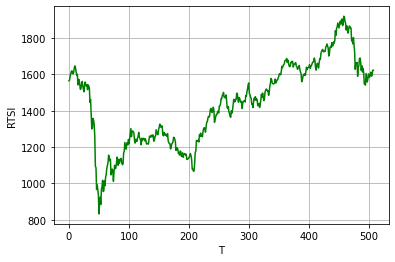

In [5]:
x=np.linspace(0,len(targets_[0]),len(targets_[0]))
fig, ax = plt.subplots()
ax.plot(x,targets_[0],color='green')
ax.grid()
ax.set_xlabel('T')
ax.set_ylabel('RTSI')
plt.show()

# Экспоненциальное сглаживание

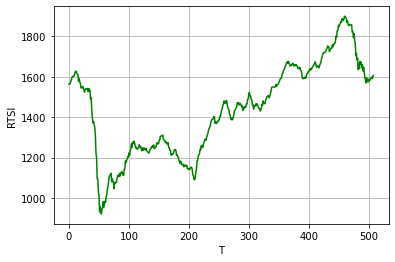

In [6]:
RTSI_list=list(targets_[0])[:-1]
def exp_smoothing(alpha,arr):
    exp_data=list()
    exp_data.append(arr[0])
    for i in range(0, len(RTSI_list)):
        exp_data.append(alpha*arr[i] + (1 - alpha) * exp_data[i - 1])
    return exp_data
exp_data=exp_smoothing(0.5,RTSI_list)
y=np.linspace(0,len(targets_[0]),len(targets_[0]))

fig, ax = plt.subplots()
ax.plot(y, exp_data,color='green')
ax.grid()
ax.set_xlabel('T')
ax.set_ylabel('RTSI')
plt.show()
    

In [7]:
#Разница между последним значением RTSI и его предсказанием по экспонециальному сглаживанию.
last_RTSI=targets_[0][-1]
print(np.abs(last_RTSI-exp_data[-1]))

15.741079341958539


# Нормализация

In [8]:
scaler = preprocessing.MinMaxScaler()
n_full_stocks = pd.DataFrame(np.hstack((scaler.fit_transform(full_stocks_pd.iloc[:,:-1]),targets)),columns=RTSI+['Time']+extra+['RTSI'])

# Линейная регрессия

# Без дополнительных признаков, без подбора гиперпараметров

In [9]:
t_targets, f_targets=n_full_stocks.iloc[:int(len(targets)*0.83),-1], n_full_stocks.iloc[int(len(targets)*0.83):,-1]
t_features, f_features=n_full_stocks.iloc[:int(len(targets)*0.83),:42], n_full_stocks.iloc[int(len(targets)*0.83):,:42]

In [10]:
model1=linear_model.Lasso()
model1.fit(t_features, t_targets)
metrics.r2_score(f_targets, model1.predict(f_features))

0.7029978628136934

# Со всеми дополнительными признаками, без подбора гиперпараметров

In [11]:
t_targets, f_targets=n_full_stocks.iloc[:int(len(targets)*0.83),-1], n_full_stocks.iloc[int(len(targets)*0.83):,-1]
t_features, f_features=n_full_stocks.iloc[:int(len(targets)*0.83),:-1], n_full_stocks.iloc[int(len(targets)*0.83):,:-1]

In [12]:
model1=linear_model.Lasso()
model1.fit(t_features, t_targets)
metrics.r2_score(f_targets, model1.predict(f_features))

0.6820032370902351

# Random Grid Search и Линейная регрессия

In [13]:
t_targets, f_targets=n_full_stocks.iloc[:int(len(targets)*0.8),-1], n_full_stocks.iloc[int(len(targets)*0.8):,-1]
t_features, f_features=n_full_stocks.iloc[:int(len(targets)*0.8),:42], n_full_stocks.iloc[int(len(targets)*0.8):,:42]
tscv = TimeSeriesSplit(n_splits=3)
model1=linear_model.Lasso()
print(model1.get_params().keys())
parameters_grid = {
    'max_iter' : np.arange(5,30),
    'alpha' : np.linspace(0.001, 4, num = 30),
}
grid3_cv = model_selection.RandomizedSearchCV(model1, parameters_grid, scoring = 'r2', cv = tscv, n_iter = 30, random_state=3)

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])


In [14]:
%%time
grid3_cv.fit(t_features, t_targets)
print(grid3_cv.best_estimator_)
print(grid3_cv.best_score_)
print(grid3_cv.best_params_)

Lasso(alpha=1.6557586206896548, max_iter=8)
0.5502869335145034
{'max_iter': 8, 'alpha': 1.6557586206896548}
Wall time: 1.16 s


In [15]:
metrics.r2_score(f_targets,grid3_cv.predict(f_features))

0.4401112705454294

# С дополнительными признаками

In [16]:
t_targets1, f_targets1=n_full_stocks.iloc[:int(len(targets)*0.8),-1], n_full_stocks.iloc[int(len(targets)*0.8):,-1]
t_features1, f_features1=n_full_stocks.iloc[:int(len(targets)*0.8),:-1], n_full_stocks.iloc[int(len(targets)*0.8):,:-1]

In [17]:
%%time
grid3_cv.fit(t_features1, t_targets1)
print(grid3_cv.best_estimator_)
print(grid3_cv.best_score_)
print(grid3_cv.best_params_)

Lasso(alpha=0.41468965517241374, max_iter=16)
0.7255506203051855
{'max_iter': 16, 'alpha': 0.41468965517241374}
Wall time: 1.27 s


In [18]:
metrics.r2_score(f_targets1,grid3_cv.predict(f_features1))

0.43755385662070745

# CatBoost

In [19]:
catmodel = CatBoostRegressor()

In [20]:
t_targets2, f_targets2=n_full_stocks.iloc[:int(len(targets)*0.8),-1], n_full_stocks.iloc[int(len(targets)*0.8):,-1]
t_features2, f_features2=n_full_stocks.iloc[:int(len(targets)*0.8),:42], n_full_stocks.iloc[int(len(targets)*0.8):,:42]

In [21]:
catmodel.fit(t_features2, t_targets2)

Learning rate set to 0.035494
0:	learn: 187.9269593	total: 182ms	remaining: 3m 1s
1:	learn: 182.4628479	total: 227ms	remaining: 1m 53s
2:	learn: 177.3378502	total: 254ms	remaining: 1m 24s
3:	learn: 172.2620454	total: 281ms	remaining: 1m 9s
4:	learn: 167.2680377	total: 306ms	remaining: 1m
5:	learn: 162.4233976	total: 332ms	remaining: 55.1s
6:	learn: 157.9611223	total: 357ms	remaining: 50.7s
7:	learn: 153.4670529	total: 416ms	remaining: 51.5s
8:	learn: 149.1827003	total: 446ms	remaining: 49.1s
9:	learn: 144.8501256	total: 472ms	remaining: 46.7s
10:	learn: 140.8942794	total: 499ms	remaining: 44.9s
11:	learn: 136.8423683	total: 525ms	remaining: 43.3s
12:	learn: 132.8308981	total: 551ms	remaining: 41.8s
13:	learn: 129.1523491	total: 593ms	remaining: 41.8s
14:	learn: 125.4887787	total: 621ms	remaining: 40.8s
15:	learn: 121.9740606	total: 652ms	remaining: 40.1s
16:	learn: 118.4251147	total: 688ms	remaining: 39.8s
17:	learn: 115.1558021	total: 714ms	remaining: 39s
18:	learn: 111.9688177	total:

161:	learn: 13.5278726	total: 5.38s	remaining: 27.9s
162:	learn: 13.4700837	total: 5.41s	remaining: 27.8s
163:	learn: 13.4342775	total: 5.44s	remaining: 27.7s
164:	learn: 13.3838492	total: 5.46s	remaining: 27.6s
165:	learn: 13.3245128	total: 5.49s	remaining: 27.6s
166:	learn: 13.2786197	total: 5.51s	remaining: 27.5s
167:	learn: 13.2339608	total: 5.54s	remaining: 27.4s
168:	learn: 13.1855245	total: 5.58s	remaining: 27.4s
169:	learn: 13.1360816	total: 5.61s	remaining: 27.4s
170:	learn: 13.0898157	total: 5.63s	remaining: 27.3s
171:	learn: 13.0566651	total: 5.66s	remaining: 27.2s
172:	learn: 13.0461841	total: 5.68s	remaining: 27.2s
173:	learn: 13.0170026	total: 5.71s	remaining: 27.1s
174:	learn: 12.9803346	total: 5.74s	remaining: 27.1s
175:	learn: 12.9603530	total: 5.8s	remaining: 27.1s
176:	learn: 12.9440936	total: 5.84s	remaining: 27.2s
177:	learn: 12.8885019	total: 5.88s	remaining: 27.2s
178:	learn: 12.8407899	total: 5.91s	remaining: 27.1s
179:	learn: 12.8158799	total: 5.96s	remaining: 

323:	learn: 8.5463451	total: 10.3s	remaining: 21.4s
324:	learn: 8.5400298	total: 10.3s	remaining: 21.4s
325:	learn: 8.5035319	total: 10.3s	remaining: 21.4s
326:	learn: 8.4840053	total: 10.4s	remaining: 21.3s
327:	learn: 8.4556612	total: 10.4s	remaining: 21.3s
328:	learn: 8.4505018	total: 10.4s	remaining: 21.2s
329:	learn: 8.4339877	total: 10.4s	remaining: 21.2s
330:	learn: 8.4072102	total: 10.5s	remaining: 21.2s
331:	learn: 8.3763023	total: 10.5s	remaining: 21.1s
332:	learn: 8.3728484	total: 10.5s	remaining: 21.1s
333:	learn: 8.3414640	total: 10.6s	remaining: 21.1s
334:	learn: 8.3133331	total: 10.6s	remaining: 21s
335:	learn: 8.2720241	total: 10.6s	remaining: 21s
336:	learn: 8.2426855	total: 10.7s	remaining: 21s
337:	learn: 8.2380764	total: 10.7s	remaining: 20.9s
338:	learn: 8.2178235	total: 10.7s	remaining: 20.9s
339:	learn: 8.1796612	total: 10.7s	remaining: 20.8s
340:	learn: 8.1688816	total: 10.8s	remaining: 20.8s
341:	learn: 8.1648787	total: 10.8s	remaining: 20.8s
342:	learn: 8.1616

483:	learn: 6.0432954	total: 14.9s	remaining: 15.8s
484:	learn: 6.0411658	total: 14.9s	remaining: 15.8s
485:	learn: 6.0213145	total: 14.9s	remaining: 15.8s
486:	learn: 6.0152703	total: 14.9s	remaining: 15.7s
487:	learn: 6.0023111	total: 14.9s	remaining: 15.7s
488:	learn: 6.0002844	total: 15s	remaining: 15.6s
489:	learn: 5.9868275	total: 15s	remaining: 15.6s
490:	learn: 5.9735085	total: 15s	remaining: 15.6s
491:	learn: 5.9595177	total: 15.1s	remaining: 15.6s
492:	learn: 5.9403475	total: 15.1s	remaining: 15.5s
493:	learn: 5.9383426	total: 15.1s	remaining: 15.5s
494:	learn: 5.9265338	total: 15.1s	remaining: 15.4s
495:	learn: 5.9141744	total: 15.2s	remaining: 15.4s
496:	learn: 5.9113268	total: 15.2s	remaining: 15.4s
497:	learn: 5.8943543	total: 15.2s	remaining: 15.4s
498:	learn: 5.8930467	total: 15.3s	remaining: 15.3s
499:	learn: 5.8841375	total: 15.3s	remaining: 15.3s
500:	learn: 5.8698799	total: 15.3s	remaining: 15.3s
501:	learn: 5.8535674	total: 15.4s	remaining: 15.3s
502:	learn: 5.8355

648:	learn: 4.5404587	total: 19.3s	remaining: 10.4s
649:	learn: 4.5246929	total: 19.3s	remaining: 10.4s
650:	learn: 4.5199436	total: 19.3s	remaining: 10.3s
651:	learn: 4.5181607	total: 19.3s	remaining: 10.3s
652:	learn: 4.5154640	total: 19.3s	remaining: 10.3s
653:	learn: 4.5067908	total: 19.4s	remaining: 10.2s
654:	learn: 4.4981922	total: 19.4s	remaining: 10.2s
655:	learn: 4.4967749	total: 19.4s	remaining: 10.2s
656:	learn: 4.4957070	total: 19.4s	remaining: 10.2s
657:	learn: 4.4924884	total: 19.5s	remaining: 10.1s
658:	learn: 4.4882367	total: 19.5s	remaining: 10.1s
659:	learn: 4.4798494	total: 19.5s	remaining: 10.1s
660:	learn: 4.4788683	total: 19.5s	remaining: 10s
661:	learn: 4.4692066	total: 19.6s	remaining: 9.98s
662:	learn: 4.4682681	total: 19.6s	remaining: 9.95s
663:	learn: 4.4621678	total: 19.6s	remaining: 9.92s
664:	learn: 4.4598227	total: 19.6s	remaining: 9.89s
665:	learn: 4.4541542	total: 19.7s	remaining: 9.86s
666:	learn: 4.4392564	total: 19.7s	remaining: 9.82s
667:	learn: 4.

810:	learn: 3.5107497	total: 23.3s	remaining: 5.42s
811:	learn: 3.5053445	total: 23.3s	remaining: 5.4s
812:	learn: 3.4983818	total: 23.4s	remaining: 5.37s
813:	learn: 3.4916840	total: 23.4s	remaining: 5.34s
814:	learn: 3.4846190	total: 23.4s	remaining: 5.31s
815:	learn: 3.4744953	total: 23.4s	remaining: 5.29s
816:	learn: 3.4733875	total: 23.5s	remaining: 5.25s
817:	learn: 3.4648300	total: 23.5s	remaining: 5.23s
818:	learn: 3.4634243	total: 23.5s	remaining: 5.2s
819:	learn: 3.4585910	total: 23.5s	remaining: 5.17s
820:	learn: 3.4511196	total: 23.6s	remaining: 5.14s
821:	learn: 3.4480663	total: 23.6s	remaining: 5.11s
822:	learn: 3.4469968	total: 23.6s	remaining: 5.08s
823:	learn: 3.4441161	total: 23.6s	remaining: 5.05s
824:	learn: 3.4375177	total: 23.7s	remaining: 5.02s
825:	learn: 3.4327847	total: 23.7s	remaining: 4.99s
826:	learn: 3.4278555	total: 23.7s	remaining: 4.96s
827:	learn: 3.4237964	total: 23.8s	remaining: 4.93s
828:	learn: 3.4158917	total: 23.8s	remaining: 4.91s
829:	learn: 3.

970:	learn: 2.7665888	total: 27.2s	remaining: 814ms
971:	learn: 2.7648644	total: 27.3s	remaining: 786ms
972:	learn: 2.7632507	total: 27.3s	remaining: 757ms
973:	learn: 2.7582923	total: 27.3s	remaining: 729ms
974:	learn: 2.7559343	total: 27.3s	remaining: 701ms
975:	learn: 2.7503912	total: 27.4s	remaining: 673ms
976:	learn: 2.7489465	total: 27.4s	remaining: 645ms
977:	learn: 2.7469523	total: 27.4s	remaining: 616ms
978:	learn: 2.7416840	total: 27.4s	remaining: 589ms
979:	learn: 2.7345754	total: 27.5s	remaining: 560ms
980:	learn: 2.7333501	total: 27.5s	remaining: 532ms
981:	learn: 2.7313320	total: 27.5s	remaining: 504ms
982:	learn: 2.7310157	total: 27.5s	remaining: 476ms
983:	learn: 2.7288985	total: 27.6s	remaining: 448ms
984:	learn: 2.7203436	total: 27.6s	remaining: 420ms
985:	learn: 2.7158446	total: 27.6s	remaining: 392ms
986:	learn: 2.7128938	total: 27.6s	remaining: 364ms
987:	learn: 2.7068474	total: 27.7s	remaining: 336ms
988:	learn: 2.7045385	total: 27.7s	remaining: 308ms
989:	learn: 

In [22]:
catmodel.predict(f_features2)

array([1645.30182211, 1646.26055623, 1642.84118472, 1646.54428031,
       1638.41506939, 1640.11785792, 1630.11323106, 1639.25342191,
       1645.30436085, 1645.4292025 , 1643.81045256, 1646.29240646,
       1651.01151426, 1644.17956067, 1652.45287171, 1651.99589712,
       1649.89095985, 1643.62510099, 1632.21222824, 1638.79940111,
       1598.52611832, 1599.34742751, 1611.76984984, 1614.39365001,
       1613.55072597, 1606.85086358, 1603.94281298, 1595.59343102,
       1599.5231266 , 1604.81980111, 1604.44814807, 1607.0411896 ,
       1607.4780327 , 1603.98361504, 1596.82796758, 1606.9370612 ,
       1606.83439244, 1600.42149171, 1596.56039479, 1597.64244659,
       1598.36889137, 1608.35671756, 1614.28407075, 1609.21682285,
       1613.89714514, 1613.55690043, 1611.48658927, 1610.79834282,
       1615.88448791, 1604.76456611, 1613.95957895, 1603.84739151,
       1606.57851089, 1606.59522654, 1606.12516053, 1590.26709186,
       1583.14902134, 1590.85710695, 1587.55890328, 1587.29835

In [23]:
metrics.r2_score(f_targets2,catmodel.predict(f_features2))

-1.4878205239498357